In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
list(iris.keys())
import pandas as pd
ir = pd.DataFrame(iris['data'])
ir['Species'] = pd.DataFrame(iris['target'])
ir

,0,1,2,3,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
#list(iris.keys())
import pandas as pd
ir = pd.DataFrame(iris['data'])
ir['Species'] = pd.DataFrame(iris['target'])
ir['Species'] = ir['Species'].replace({0: "setosa", 1: "versicolor", 2: 'virginica'})
for i in range(len(ir['Species'])):
    if ir['Species'][i] == 'setosa':
        ir['Species'][i] = 1
    else:
        ir['Species'][i] = 0
ir

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,0,1,2,3,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [ ]:
from sklearn.model_selection import train_test_split
ir_features = ir.drop(columns = 'Species')
ir_label = ir['Species']
x_train, x_test, y_train, y_test = train_test_split(ir_features, ir_label,test_size = 0.2,random_state = 10)

In [ ]:
x_train['Species'] = y_train
df = x_train

In [ ]:
def stratified_spl(df):
    df1 = df[df['Species'] == 1]
    df0 = df[df['Species'] == 0]
    df1_spl = df1.sample(n=4)
    df0_spl = df0.sample(n=8)
    return pd.concat([df1_spl, df0_spl])

In [ ]:
def sigmoid(X, w):
    z = np.dot(w, X.T)
    return 1/(1+np.exp(-(z)))

In [ ]:
def xy(df):
    df_features = df.drop(columns = 'Species')
    df_label = df['Species']
    df_features['00'] = [1]*12
    return df_features, df_label

In [ ]:
def error(X, y, w):
    n = len(X)
    yp = sigmoid(X, w)
    return np.sum((yp-y)**2)/n


In [ ]:
def grad_des(df, w, alpha, epoch):
    j = []
    w1 = []
    w1.append(w)
    for i in range(epoch):
        d = stratified_spl(df)
        X, y = xy(d)
        n= len(X)
        yp = sigmoid(X, w)

        for i in range(4):
            w[i] -= (alpha/n) * np.sum(-2*X[i]*(y-yp))
        w[4] -= (alpha/n) *np.sum(-2*(y-yp))
        w1.append(list(w))
        j.append(error(X, y, w))
    return j, w1

## **#Testing**

In [ ]:
import numpy as np
w = np.random.rand(5)
w

array([0.21722078, 0.95856404, 0.09814881, 0.32393343, 0.63584575])

In [ ]:
j, w1 = grad_des(x_train, w, 0.01, 100)

In [ ]:
def err_test(X, y, w):
    er = []
    for i in range(len(w1)):
        er.append(error(X, y, w[i]))
    return er


In [ ]:
def plot(X, y, w):
    error = err_test(X, y, w)
    return plt.scatter(range(len(error)), error)

In [ ]:
X = x_train.drop(columns = 'Species')
X['00'] = [1]*len(X)

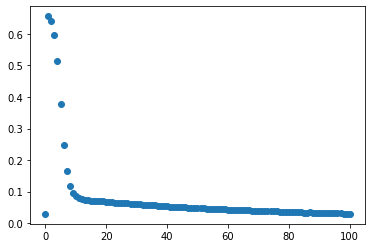

In [ ]:
import matplotlib.pyplot as plt
plot(X, y_train, w1)

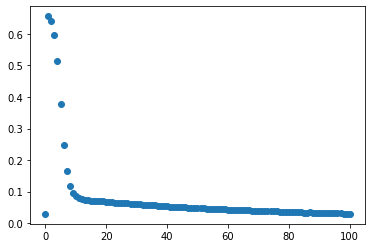

In [ ]:
import matplotlib.pyplot as plt
def plot(X, y, w):
    error = err_test(X, y, w)
    return plt.scatter(range(len(error)), error)
X = x_train.drop(columns = 'Species')
X['00'] = [1]*len(X)
plot(X, y_train, w1)
